## Preprocess

Data is from http://mrl.cs.vsb.cz/eyedataset

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
import pickle

In [8]:
IMG_DIM = 50
training_data = []
X = []
y = []

In [6]:
dataset_path = os.path.join(os.getcwd(), 'mrlEyes_2018_01')
folders = [x for x in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, x))]
print(dataset_path)
print(folders)

Shape =  (86, 86)
Shape=  (50, 50)


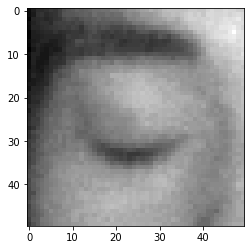

In [18]:
for folder in folders:
    folder_path = os.path.join(dataset_path, folder)
    for img in os.listdir(folder_path):
        imgpath=os.path.join(folder_path,img)
        #print(imgpath)
        snap = cv2.imread(imgpath, cv2.IMREAD_GRAYSCALE)
        #print(snap)
        #print(img.split('_')[4])  #label
        print("Shape = ", snap.shape)
        snap = cv2.resize(snap, (IMG_DIM, IMG_DIM))
        print("Shape= ",snap.shape)
        plt.imshow(snap, cmap='gray')
        plt.show()
        break
    break

In [19]:
def create_dataset():
    global X,y
    for folder in folders:
        folder_path = os.path.join(dataset_path, folder)
        for img in os.listdir(folder_path):
            img_path=os.path.join(folder_path,img)
            snap = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            snap = cv2.resize(snap, (IMG_DIM, IMG_DIM))
            eye_state = int(img.split('_')[4])
            training_data.append([snap, eye_state])
    random.shuffle(training_data)
    for img, label in training_data:
        X.append(img)
        y.append(label)
    
    X = np.array(X).reshape(-1, IMG_DIM, IMG_DIM, 1)
    X = X/255.0
    
    pickle_out = open('processed_data/X.pickle', "wb")
    pickle.dump(X, pickle_out)
    pickle_out.close()

    pickle_out = open('processed_data/y.pickle', "wb")
    pickle.dump(y, pickle_out)
    pickle_out.close()

In [20]:
create_dataset()

In [21]:
print(len(X))
print(len(y))

84898
84898
